In [49]:
# AtLAST Maps of Ponos

# Testing Maria Module
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from astropy.io import fits
import maria
from maria import Simulation, mappers, TOD
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.constants import c
from matplotlib.colors import LogNorm

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('../sens_calc/results_of_instrument_simulation.csv', index_col=0) 

In [10]:
df

,fmin,fmax,Nwafer,det_spacing_freq,Detector Count,Beam in Arcseconds,Loading at Detector in pW,NEP at Detectors in aWrtHz,NEFD of a Single Detector,NEFD of Entire Frequency Band,Mapping speed in deg^2/mJ^2/hour,Mapping speed in deg^2/(30 uJ)^2/hour,NET_RJ of a Single Detector,NET_RJ of Entire Frequency Band,Mapping speed in deg^2/uKrj^2/hour
0,75.0,110.0,6,120.0,8760.0,15.135135,3.020274e+00,29.954679,0.198463,0.002120,16035.441825,0.144319,1.367981e+02,1.461598,0.033750
1,130.0,170.0,6,120.0,8760.0,9.333333,3.078977e+00,33.025403,0.191549,0.002047,6546.041662,0.058914,1.328219e+02,1.419115,0.013614
2,195.0,245.0,8,250.0,50672.0,6.363636,4.893073e+00,49.097044,0.230025,0.001022,12206.433851,0.109858,1.564351e+02,0.694944,0.026392
3,245.0,310.0,8,250.0,50672.0,5.045045,7.788639e+00,69.317884,0.252002,0.001119,6392.244785,0.057530,1.680799e+02,0.746675,0.014369
4,335.0,365.0,20,375.0,285040.0,4.000000,6.551153e+00,77.769342,0.659806,0.001236,3297.279434,0.029676,4.022697e+02,0.753467,0.008871
5,390.0,420.0,20,375.0,285040.0,3.456790,1.052103e+01,114.952528,1.150142,0.002154,810.421125,0.007294,6.048787e+02,1.132962,0.002930
6,625.0,710.0,10,640.0,415100.0,2.097378,6.256720e+01,385.176212,2.594954,0.004028,85.351024,0.000768,7.260300e+02,1.126881,0.001090
7,845.0,900.0,6,870.0,460236.0,1.604585,4.072066e+01,328.135353,3.656130,0.005389,27.901308,0.000251,9.625514e+02,1.418841,0.000403
8,NaN,NaN,50,NaN,NaN,NaN,2.340058e-07,0.021194,2066.490231,NaN,NaN,NaN,1.448389e+06,NaN,NaN


In [43]:
f_c = 100
b_w = 52
# frq_index = np.argmin(np.abs(freq - df['fmin']))
frq_index = 0

use_b_w = df['fmax'][frq_index]-df['fmin'][frq_index]
NET = df['NET_RJ of a Single Detector'][frq_index]
NET_total = df['NET_RJ of Entire Frequency Band'][frq_index]
ndet_used = df['Detector Count'][frq_index]


In [44]:
NET_total * np.sqrt(ndet_used)/NET

1.0

In [48]:
df['NET_RJ of a Single Detector'][find_freq]/np.sqrt(b_w/use_b_w)

112.23090657107306

In [47]:
266e-6/np.sqrt(52/37.4)*1e6

225.58788156213606

In [4]:
from maria.noise.levels import InitNoise

In [9]:
noise = InitNoise(f_c = 100, b_w = 0.01)
print(noise.white_noise_RJ, noise.pink_noise_RJ)

8093.085766676246 21.677908303597086


In [54]:
# Paths to data and where to save
path_fits = '/Users/alicesc/CASA_fits/maria_files/'
plot_path = '/Users/alicesc/Maria/'

# Input files
# CII
CII_file_z65 = path_fits + 'maria_Ponos_fits_CII_jy_6.5.fits'
CII_file_z6 = path_fits + 'maria_Ponos_fits_CII_jy_6.0.fits'
CII_file_z3 = path_fits + 'maria_Ponos_fits_CII_jy_3.0.fits'
CII_file_z1 = path_fits + 'maria_Ponos_fits_CII_jy_1.0.fits'
CII_file_z05 = path_fits + 'maria_Ponos_fits_CII_jy_0.5.fits'
CII_file_z02 = path_fits + 'maria_Ponos_fits_CII_jy_0.02.fits'
CII_file_z01 = path_fits + 'maria_Ponos_fits_CII_jy_0.01.fits'
CII_file_z0 = path_fits + 'maria_Ponos_fits_CII_jy_0.00015.fits'

# OIII
OIII_file_z65 = path_fits + 'maria_Ponos_fits_OIII_jy_6.5.fits'
OIII_file_z6 = path_fits + 'maria_Ponos_fits_OIII_jy_6.0.fits'
OIII_file_z3 = path_fits + 'maria_Ponos_fits_OIII_jy_3.0.fits'
OIII_file_z1 = path_fits + 'maria_Ponos_fits_OIII_jy_1.0.fits'
OIII_file_z05 = path_fits + 'maria_Ponos_fits_OIII_jy_0.5.fits'
OIII_file_z02 = path_fits + 'maria_Ponos_fits_OIII_jy_0.02.fits'
OIII_file_z01 = path_fits + 'maria_Ponos_fits_OIII_jy_0.01.fits'
OIII_file_z0 = path_fits + 'maria_Ponos_fits_OIII_jy_0.00015.fits'

# CI 370
CI370_file_z65 = path_fits + 'maria_Ponos_fits_CI370_jy_6.5.fits'
CI370_file_z6 = path_fits + 'maria_Ponos_fits_CI370_jy_6.0.fits'
CI370_file_z3 = path_fits + 'maria_Ponos_fits_CI370_jy_3.0.fits'
CI370_file_z1 = path_fits + 'maria_Ponos_fits_CI370_jy_1.0.fits'
CI370_file_z05 = path_fits + 'maria_Ponos_fits_CI370_jy_0.5.fits'
CI370_file_z02 = path_fits + 'maria_Ponos_fits_CI370_jy_0.02.fits'
CI370_file_z01 = path_fits + 'maria_Ponos_fits_CI370_jy_0.01.fits'
CI370_file_z0 = path_fits + 'maria_Ponos_fits_CI370_jy_0.00015.fits'

# CI 609
CI609_file_z65 = path_fits + 'maria_Ponos_fits_CI609_jy_6.5.fits'
CI609_file_z6 = path_fits + 'maria_Ponos_fits_CI609_jy_6.0.fits'
CI609_file_z3 = path_fits + 'maria_Ponos_fits_CI609_jy_3.0.fits'
CI609_file_z1 = path_fits + 'maria_Ponos_fits_CI609_jy_1.0.fits'
CI609_file_z05 = path_fits + 'maria_Ponos_fits_CI609_jy_0.5.fits'
CI609_file_z02 = path_fits + 'maria_Ponos_fits_CI609_jy_0.02.fits'
CI609_file_z01 = path_fits + 'maria_Ponos_fits_CI609_jy_0.01.fits'
CI609_file_z0 = path_fits + 'maria_Ponos_fits_CI609_jy_0.00015.fits'

# CO
CO_file_z65 = path_fits + 'maria_Ponos_fits_CO_jy_6.5.fits'
CO_file_z6 = path_fits + 'maria_Ponos_fits_CO_jy_6.0.fits'
CO_file_z3 = path_fits + 'maria_Ponos_fits_CO_jy_3.0.fits'
CO_file_z1 = path_fits + 'maria_Ponos_fits_CO_jy_1.0.fits'
CO_file_z05 = path_fits + 'maria_Ponos_fits_CO_jy_0.5.fits'
CO_file_z02 = path_fits + 'maria_Ponos_fits_CO_jy_0.02.fits'
CO_file_z01 = path_fits + 'maria_Ponos_fits_CO_jy_0.01.fits'
CO_file_z0 = path_fits + 'maria_Ponos_fits_CO_jy_0.00015.fits'

#----------------------
# Choose Input File
inputfile = CI370_file_z0


In [55]:
# Calculate observed frequency and channel width in GHz
def  skyfrq(line, z):
    return  line / (1 + z)

def widthfrq(frq, kms):
    return (kms/c_kms) * frq

In [56]:
# List position of redshift, not redshift value
z_int = 7

# Fits Image details
resval =      1024
simsize =     50 # kpc

# Line Frequencies
CII_frq =   1900.537 # GHz
CI609_frq = 492.16 # GHz
CI370_frq = 809.34 # GHz
CO_frq =    345.79 # GHz
OIII_frq =  3393.00 # GHz

# Fits vals 0.          1.          2.          3.      4.          5.      6.      7    
redshifts = [6.5,       6.0,        3.0,        1.0,    0.5,        0.02,   0.01,   0.00015]
DL =        [64739.8,   58985.0,    25924.2,    6701.1, 2863.0,     87.5,   43.4,   0.646] # Mpc
scale =     [5.580,     5.836,      7.855,      8.122,  6.169,      0.408,  0.206,  0.0033] # kpc/"
c_kms =     299792.458 # km s-1
channel =   50 # km s-1

frq = skyfrq(CI370_frq, redshifts[z_int])
width = widthfrq(frq,channel)
print(f'Frequency:         {frq} GHz')
print(f'Channel:           {width} GHz, ({channel} km s-1)')

size                = simsize/ scale[z_int] / 3600 # deg

pixel_size          = size / resval # deg
pointing_center     = (260.0, -10.0) #RA and Dec in degrees
integration_time    =  8 * 60.0 #seconds

scanning_speed      = 0.05 #deg/s
sample_rate         = 100 # float(int(225. * (scanning_speed/0.25) * (frq/92.0)**2))  #Hz
FOV                 = size/2 # deg
ndets               = int(int(3000 * (FOV/0.25)**2 * (frq/92.0)**2))

scanning_radius     = FOV/4 #deg
Beam_size           = ((1.22*c/(frq*u.GHz).to(1/u.s)/(50 * u.m))*u.rad).to(u.arcsec)

print(f'Size:              { size} arcsec')
print(f'Beam Size:         {Beam_size}')
print(f'Pixel Size:        {pixel_size*3500} arcsec' )
print()
print(f'Scan velocity:     {scanning_speed*3600} arcsec/s')
print(f'Field of View:     {FOV*3500} arcsec' )
print(f'Scanning Radius:   {scanning_radius*3500} arcsec' )
print(f'# of Detectors:    {ndets}')
print(f'Sampling rate:     {sample_rate} Hz' )
print('-----------------------')

Frequency:         809.2186172074188 GHz
Channel:           0.1349631379331462 GHz, (50 km s-1)
Size:              4.2087542087542085 arcsec
Beam Size:         1.8645318082787061 arcsec
Pixel Size:        14.385390361952862 arcsec

Scan velocity:     180.0 arcsec/s
Field of View:     7365.319865319865 arcsec
Scanning Radius:   1841.3299663299663 arcsec
# of Detectors:    16445400
Sampling rate:     100 Hz
-----------------------


In [57]:
def f_lambda(f = frq, D = 50):
    return ((1.22 * (c/(f * u.GHz).to(1/u.s)).to(u.meter) / (D * u.m)) * u.rad).to(u.degree)

In [58]:
noisy = False
if noisy:
    atm_model            = 'single_layer'    # The atmospheric model, set to None if you want a noiseless observation.
    white_noise_level    = 0.
    pink_noise_level     = 0.
    #white_noise_level    = 1.5e-2
    #pink_noise_level     = 2.4
else:
    atm_model            = None              # The atmospheric model, set to None if you want a noiseless observation.
    white_noise_level    = 0.
    pink_noise_level     = 0.

In [59]:
# - Input figure
cmap = "RdBu_r"
# - Input figure
hdu = fits.open(inputfile)
hdu[0].data = hdu[0].data
header = hdu[0].header
print('Input: ', np.unique(hdu[0].data))
print(hdu.info())
header['RESTFRQ'] = frq
header["CDELT1"] = pixel_size  # degree
header["CDELT2"] = pixel_size  # degree
header["CTYPE1"] = "RA---SIN"
header["CUNIT1"] = "deg     "
header["CTYPE2"] = "DEC--SIN"
header["CUNIT2"] = "deg     "
header['CRPIX1'] = resval/2
header['CRPIX2'] = resval/2
header["CRVAL1"] = pointing_center[0]
header["CRVAL2"] = pointing_center[1]
header['RADESYS'] = 'FK5     '
wcs_input = WCS(header, naxis=2)
print('Changed Header')
print(hdu[0].header)

Input:  [6.23994157e-47 1.34621827e-46 1.77845504e-46 ... 2.10183882e+04
 2.17003224e+04 2.59189080e+04]
Filename: /Users/alicesc/CASA_fits/maria_files/maria_Ponos_fits_CI370_jy_0.00015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (1024, 1024)   float64   
None
Changed Header
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 1024                                                  NAXIS2  =                 1024                                                  BUNIT   = 'Jy km s**-1'                                                         CDELT1  = 0.004110111531986532                                                  CDELT2  = 0.004110111531986532                                                  CUNIT1  = 'deg     

In [60]:
sim = Simulation(

    # Mandatory minimal weather settings
    # ---------------------
    array    = "AtLAST",  # Array type
    pointing = "daisy",  # Scanning strategy
    site     = "llano_de_chajnantor",  # Site

    white_noise_level = white_noise_level,
    pink_noise_level  = pink_noise_level,

    # True sky input
    # ---------------------
    map_file     = inputfile,                # Input files must be a fits file.
    map_units    = 'Jy/pixel',               # Units of the input map in Kelvin Rayleigh-Jeans (K, default) or Jy/pixel
    map_res      = pixel_size,               # degree, overwrite header information
    map_center   = pointing_center,          # RA & Dec in degree
    map_freqs    = [frq],

    # AtLAST Observational setup
    # ----------------------------
    integration_time = integration_time,  # Seconds
    sample_rate      = sample_rate,       # Hz
    scan_center      = pointing_center,   # Degrees
    start_time       = "2022-08-01T23:00:00",

    field_of_view    = FOV,
    detector_config  = {"f950": {"n": 2200, "band_center": frq, "band_width": width}},
    scan_options     = {"speed": scanning_speed, "radius": scanning_radius, "petals": 2.11, "miss_factor": 0.07},
    verbose=True
)
print('Done')

Initializing atmosphere
Done


In [61]:
tod = sim.run()
print('TOD: ',np.unique(tod.data))

Sampling atmosphere for band f950: 100%|██████████| 1/1 [00:13<00:00, 13.40s/it]


ran atmospheric simulation in 121.4 seconds


Sampling map at 809.2186172074188 GHz: 100%|██████████| 1/1 [00:13<00:00, 13.39s/it]


TOD:  [229.85477238 229.8548799  229.85490901 ... 429.42779174 429.54444779
 430.45945464]


      band  band_center  band_width      offset_x      offset_y  baseline_x  \
0     f950   809.218617    0.134963 -9.542033e-19  1.789131e-19        -0.0   
1     f950   809.218617    0.134963 -5.890305e-04  3.400769e-04        -0.0   
2     f950   809.218617    0.134963 -5.890305e-04 -3.400769e-04         0.0   
3     f950   809.218617    0.134963 -1.079146e-18 -6.801539e-04         0.0   
4     f950   809.218617    0.134963  5.890305e-04 -3.400769e-04         0.0   
...    ...          ...         ...           ...           ...         ...   
2195  f950   809.218617    0.134963  1.590382e-02 -4.421000e-03         0.0   
2196  f950   809.218617    0.134963  1.590382e-02 -3.740846e-03         0.0   
2197  f950   809.218617    0.134963  1.590382e-02 -3.060692e-03         0.0   
2198  f950   809.218617    0.134963  1.590382e-02 -2.380539e-03         0.0   
2199  f950   809.218617    0.134963  1.590382e-02 -1.700385e-03         0.0   

      baseline_y  baseline_z  
0            0.0    

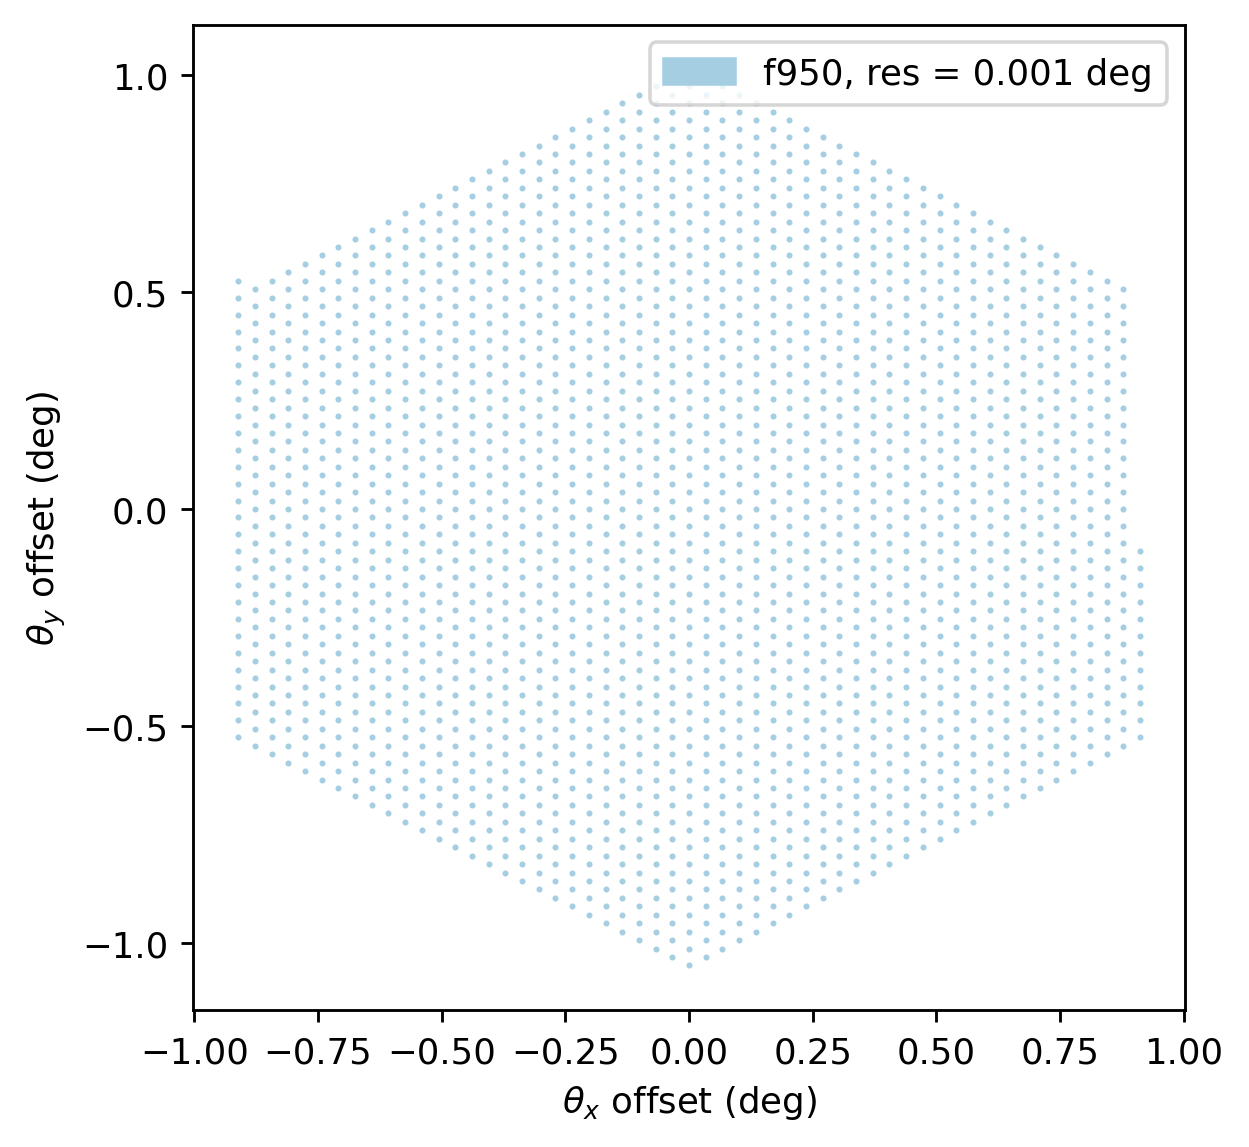

In [62]:
print(sim.array.dets)
sim.array.plot_dets()

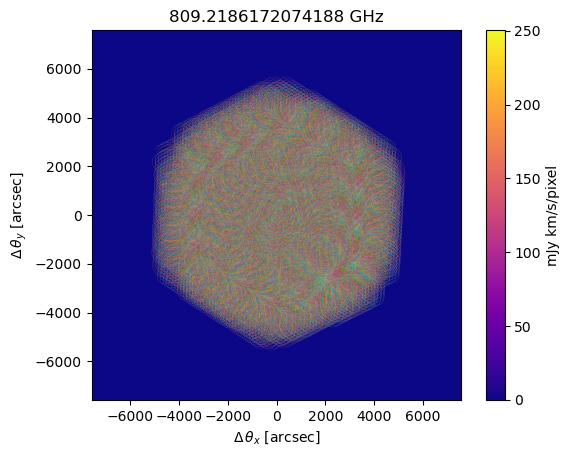

In [63]:
sim.input_map.plot(units='arcsec')

dx, dy = tod.coords.offsets(frame=sim.input_map.frame, center=sim.input_map.center, units='arcsec')

plt.plot(dx.T, dy.T, lw=1e-1)
plt.show()

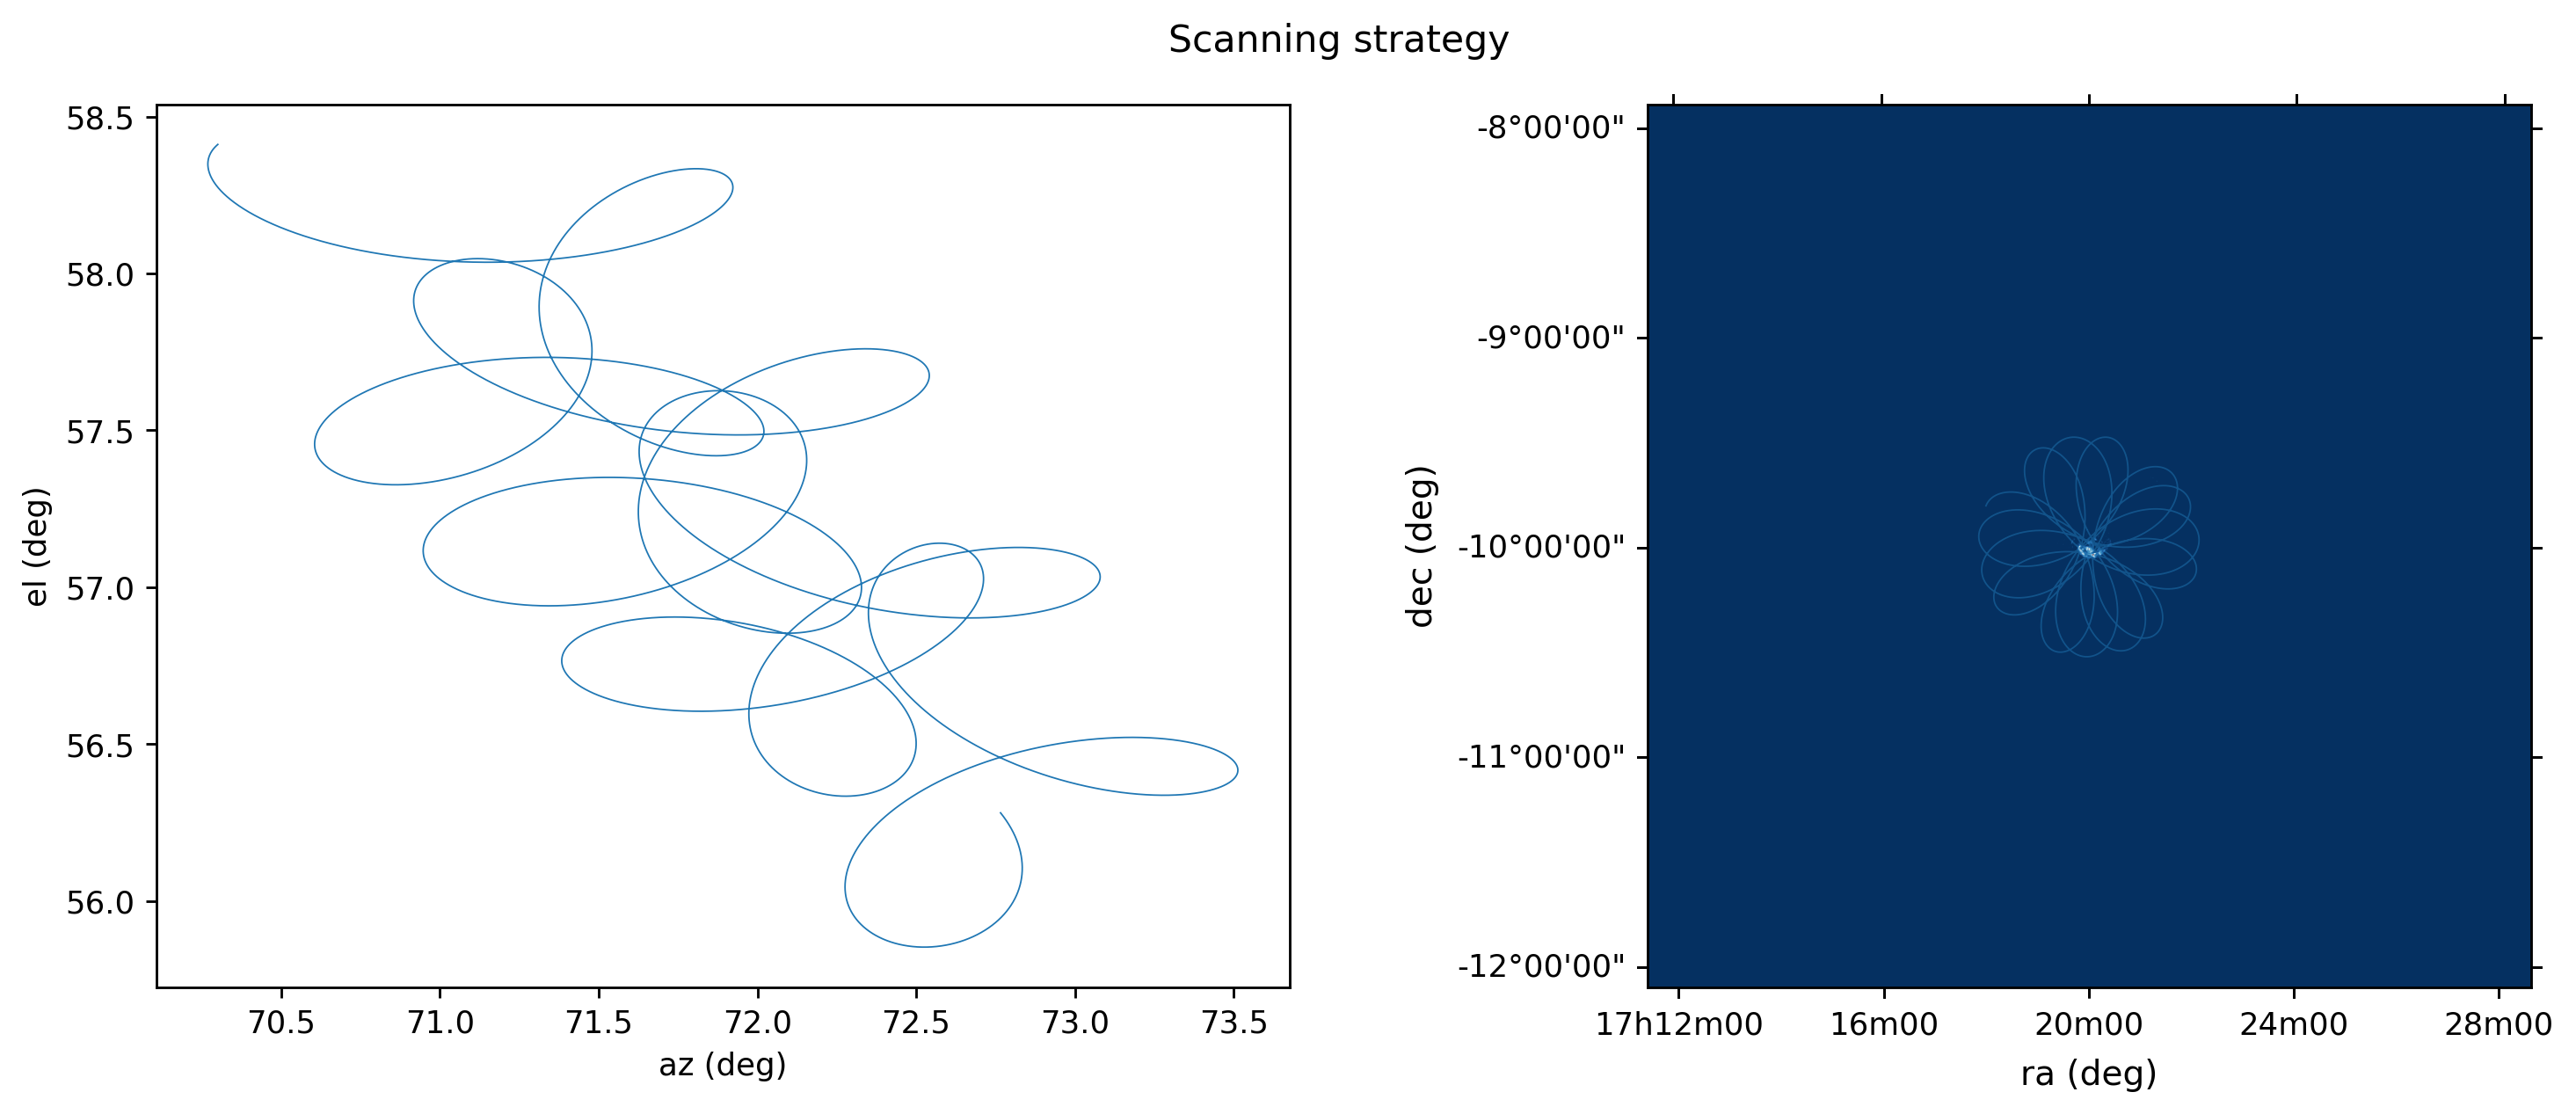

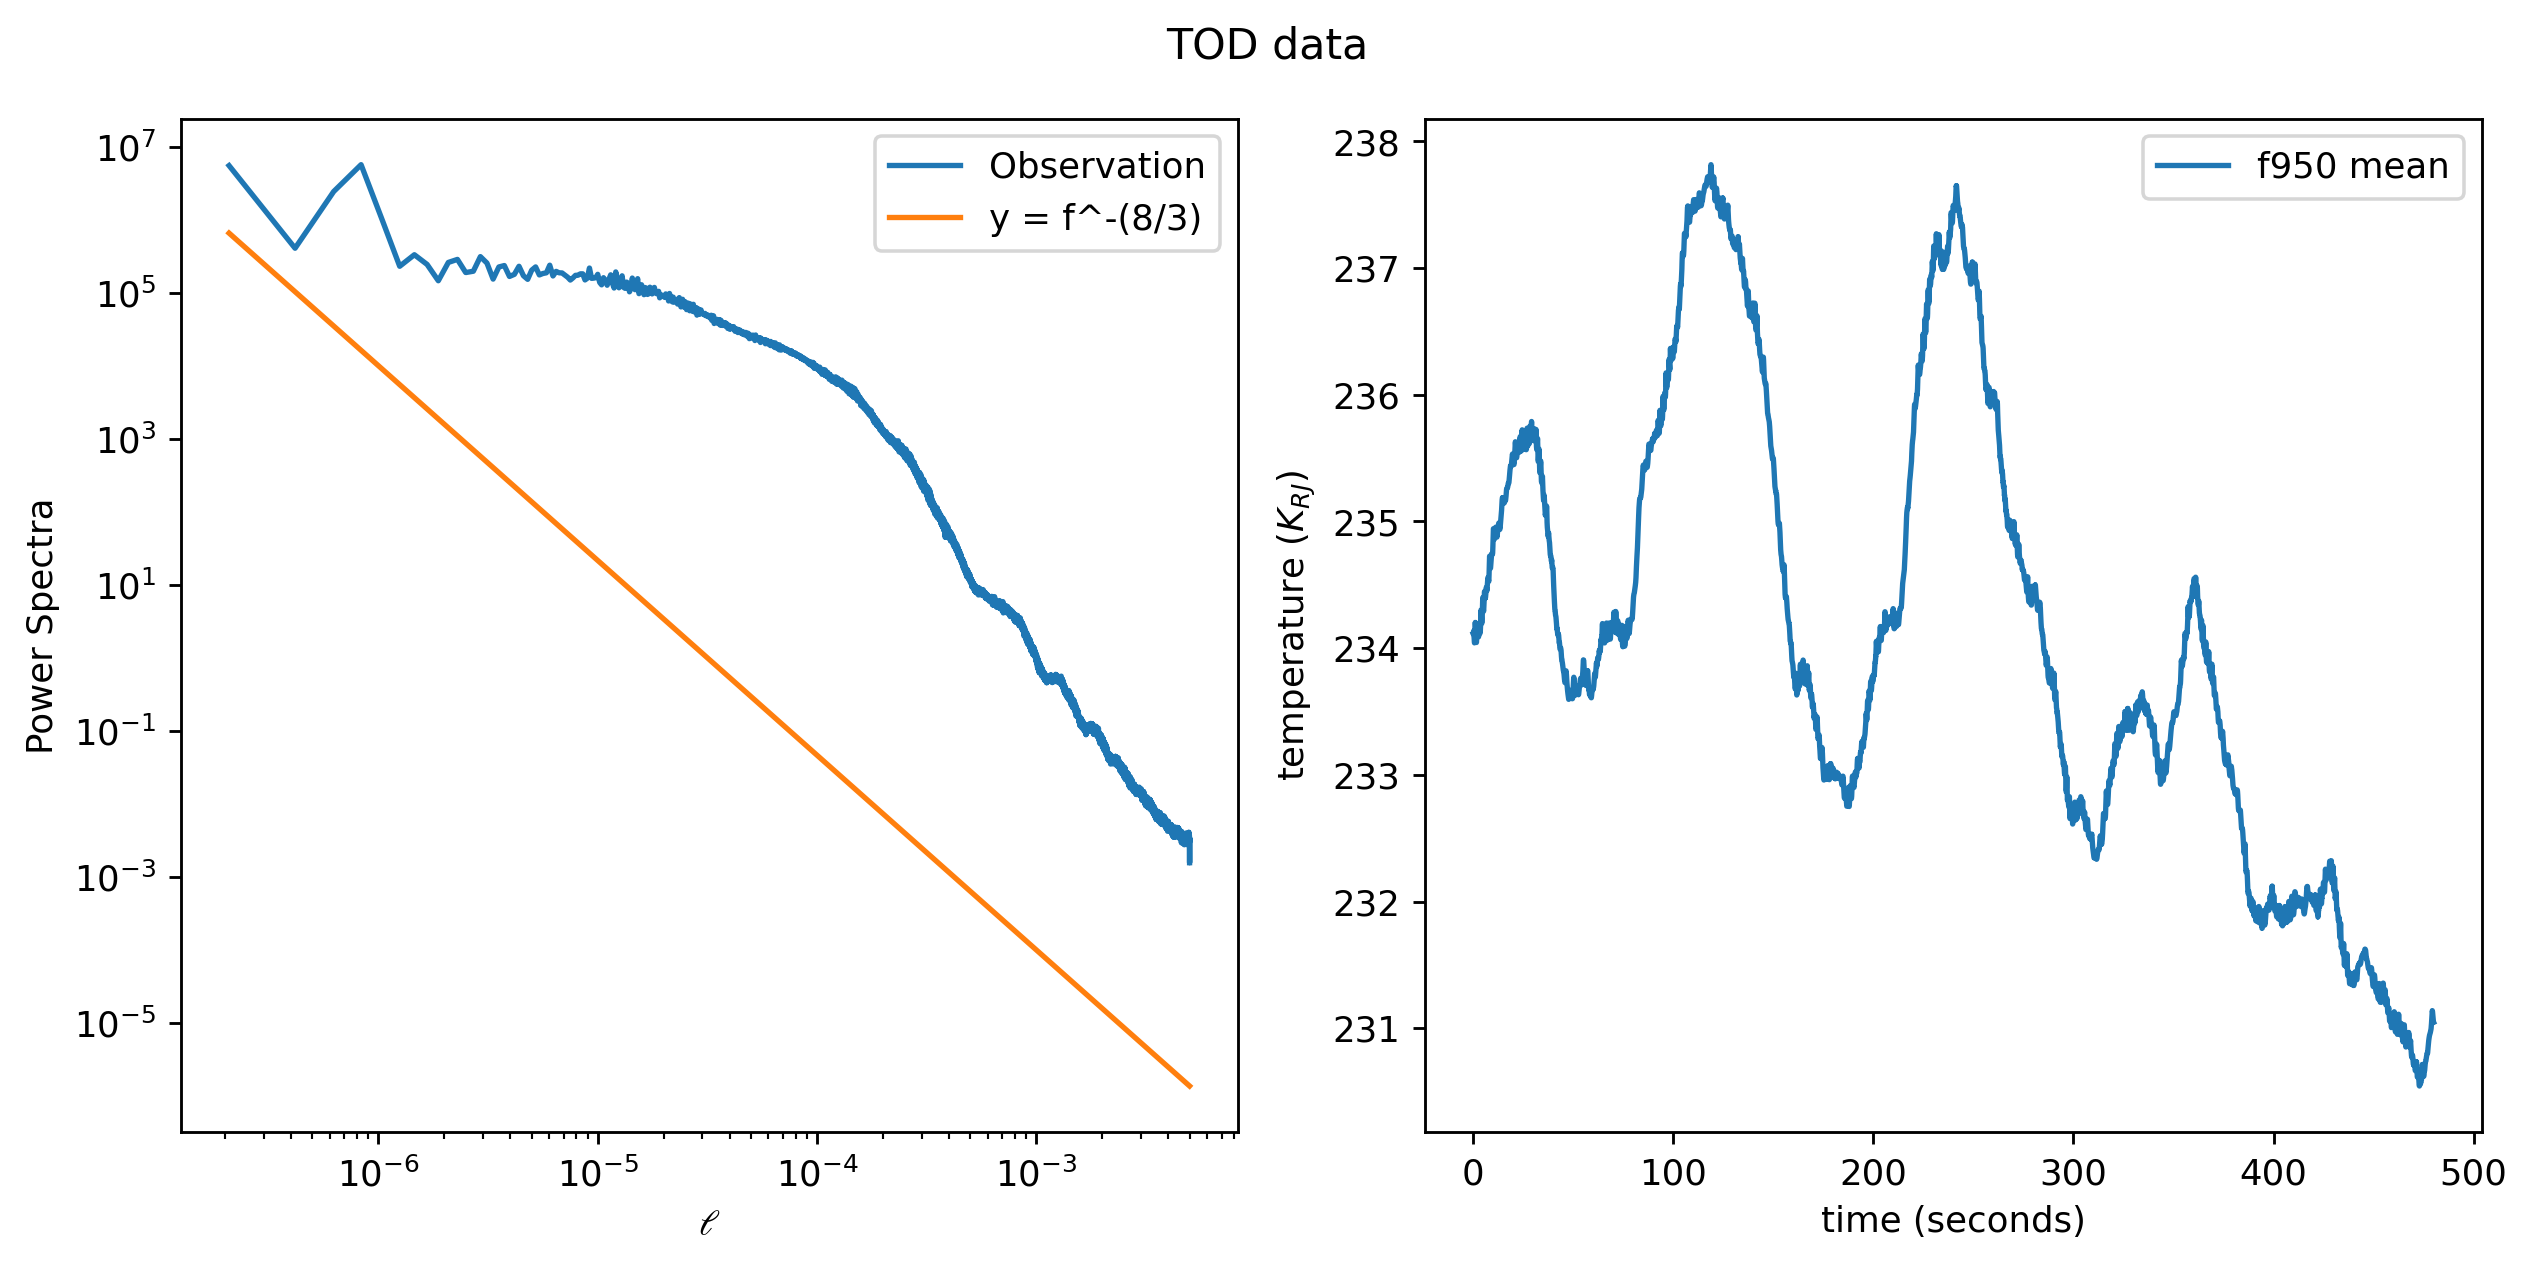

In [64]:
# visualize scanning patern
# -----------------------
cmap = "RdBu_r"

fig = plt.figure(dpi=256, tight_layout=True)
fig.set_size_inches(12, 5, forward=True)
fig.suptitle("Scanning strategy")

# - Plot
ax = plt.subplot(1, 2, 1)

ax.plot(np.degrees(tod.boresight.az), np.degrees(tod.boresight.el), lw=5e-1)
ax.set_xlabel("az (deg)"), ax.set_ylabel("el (deg)")

ax = plt.subplot(1, 2, 2, projection=wcs_input)
im = ax.imshow(hdu[0].data, cmap=cmap)

ra, dec = ax.coords
ra.set_major_formatter("hh:mm:ss")
dec.set_major_formatter("dd:mm:ss")
ra.set_axislabel(r"RA [J2000]", size=11)
dec.set_axislabel(r"Dec [J2000]", size=11)
ra.set_separator(("h", "m"))

sky = SkyCoord(np.degrees(tod.boresight.ra) * u.deg, np.degrees(tod.boresight.dec) * u.deg)
pixel_sky = wcs_input.world_to_pixel(sky)
ax.plot(pixel_sky[0], pixel_sky[1], lw=5e-1, alpha=0.5)
ax.set_xlabel("ra (deg)"), ax.set_ylabel("dec (deg)")
plt.show()

# visualize powerspectrum
# -----------------------
f, ps = sp.signal.periodogram(tod.data, fs=tod.time[1] - tod.time[0], window="tukey")

fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=256, tight_layout=True)
fig.suptitle("TOD data")
axes[0].plot(f[1:], ps.mean(axis=0)[1:], label="Observation")
axes[0].plot(f[1:], 1e-12 * f[1:] ** (-8 / 3), label="y = f^-(8/3)")
axes[0].set_xlabel(r"$\mathscr{l}$"), axes[0].set_ylabel("Power Spectra")
axes[0].loglog(), axes[0].legend()

for uib, uband in enumerate(np.unique(tod.dets.band)):
    band_mask = tod.dets.band == uband
    band_mean = tod.data[band_mask].mean(axis=0)
    axes[1].plot(tod.time - tod.time[0], band_mean, label=f"{uband} mean")

axes[1].set_xlabel("time (seconds)"), axes[1].set_ylabel(r"temperature ($K_{RJ}$)")
axes[1].legend()

plt.show()

In [75]:
from maria.map.mappers import BinMapper
fov               = (FOV*u.degree).to(u.arcsec)
scn_velocity      = scanning_speed * u.degree/u.s
filter_freq       = (scn_velocity/fov).to(u.Hz).value

mapper = BinMapper(center=(tod.boresight.center_ra, tod.boresight.center_dec),
                   frame="ra_dec",
                   width=np.radians(FOV),
                   height=np.radians(FOV),
                   res=4*np.radians(pixel_size),
                   filter_data=True,
                   filter_tods=False,
                   ffilter=filter_freq / 2,
                   n_modes_to_remove=0,
                   degrees = False,
                   map_smooth = Beam_size.value #arcsec
                  )

mapper.add_tods(tod) # add several TODs
mapper.run()

outfile_map = plot_path+ 'outmap.fits'.format(int(integration_time/60), str(noisy))
mapper.save_maps(outfile_map)

In [76]:
sky_l = SkyCoord((pointing_center[0] - 4) * u.deg, (pointing_center[1] - 4) * u.deg)
sky_u = SkyCoord((pointing_center[0] + 4) * u.deg, (pointing_center[1] + 4) * u.deg)

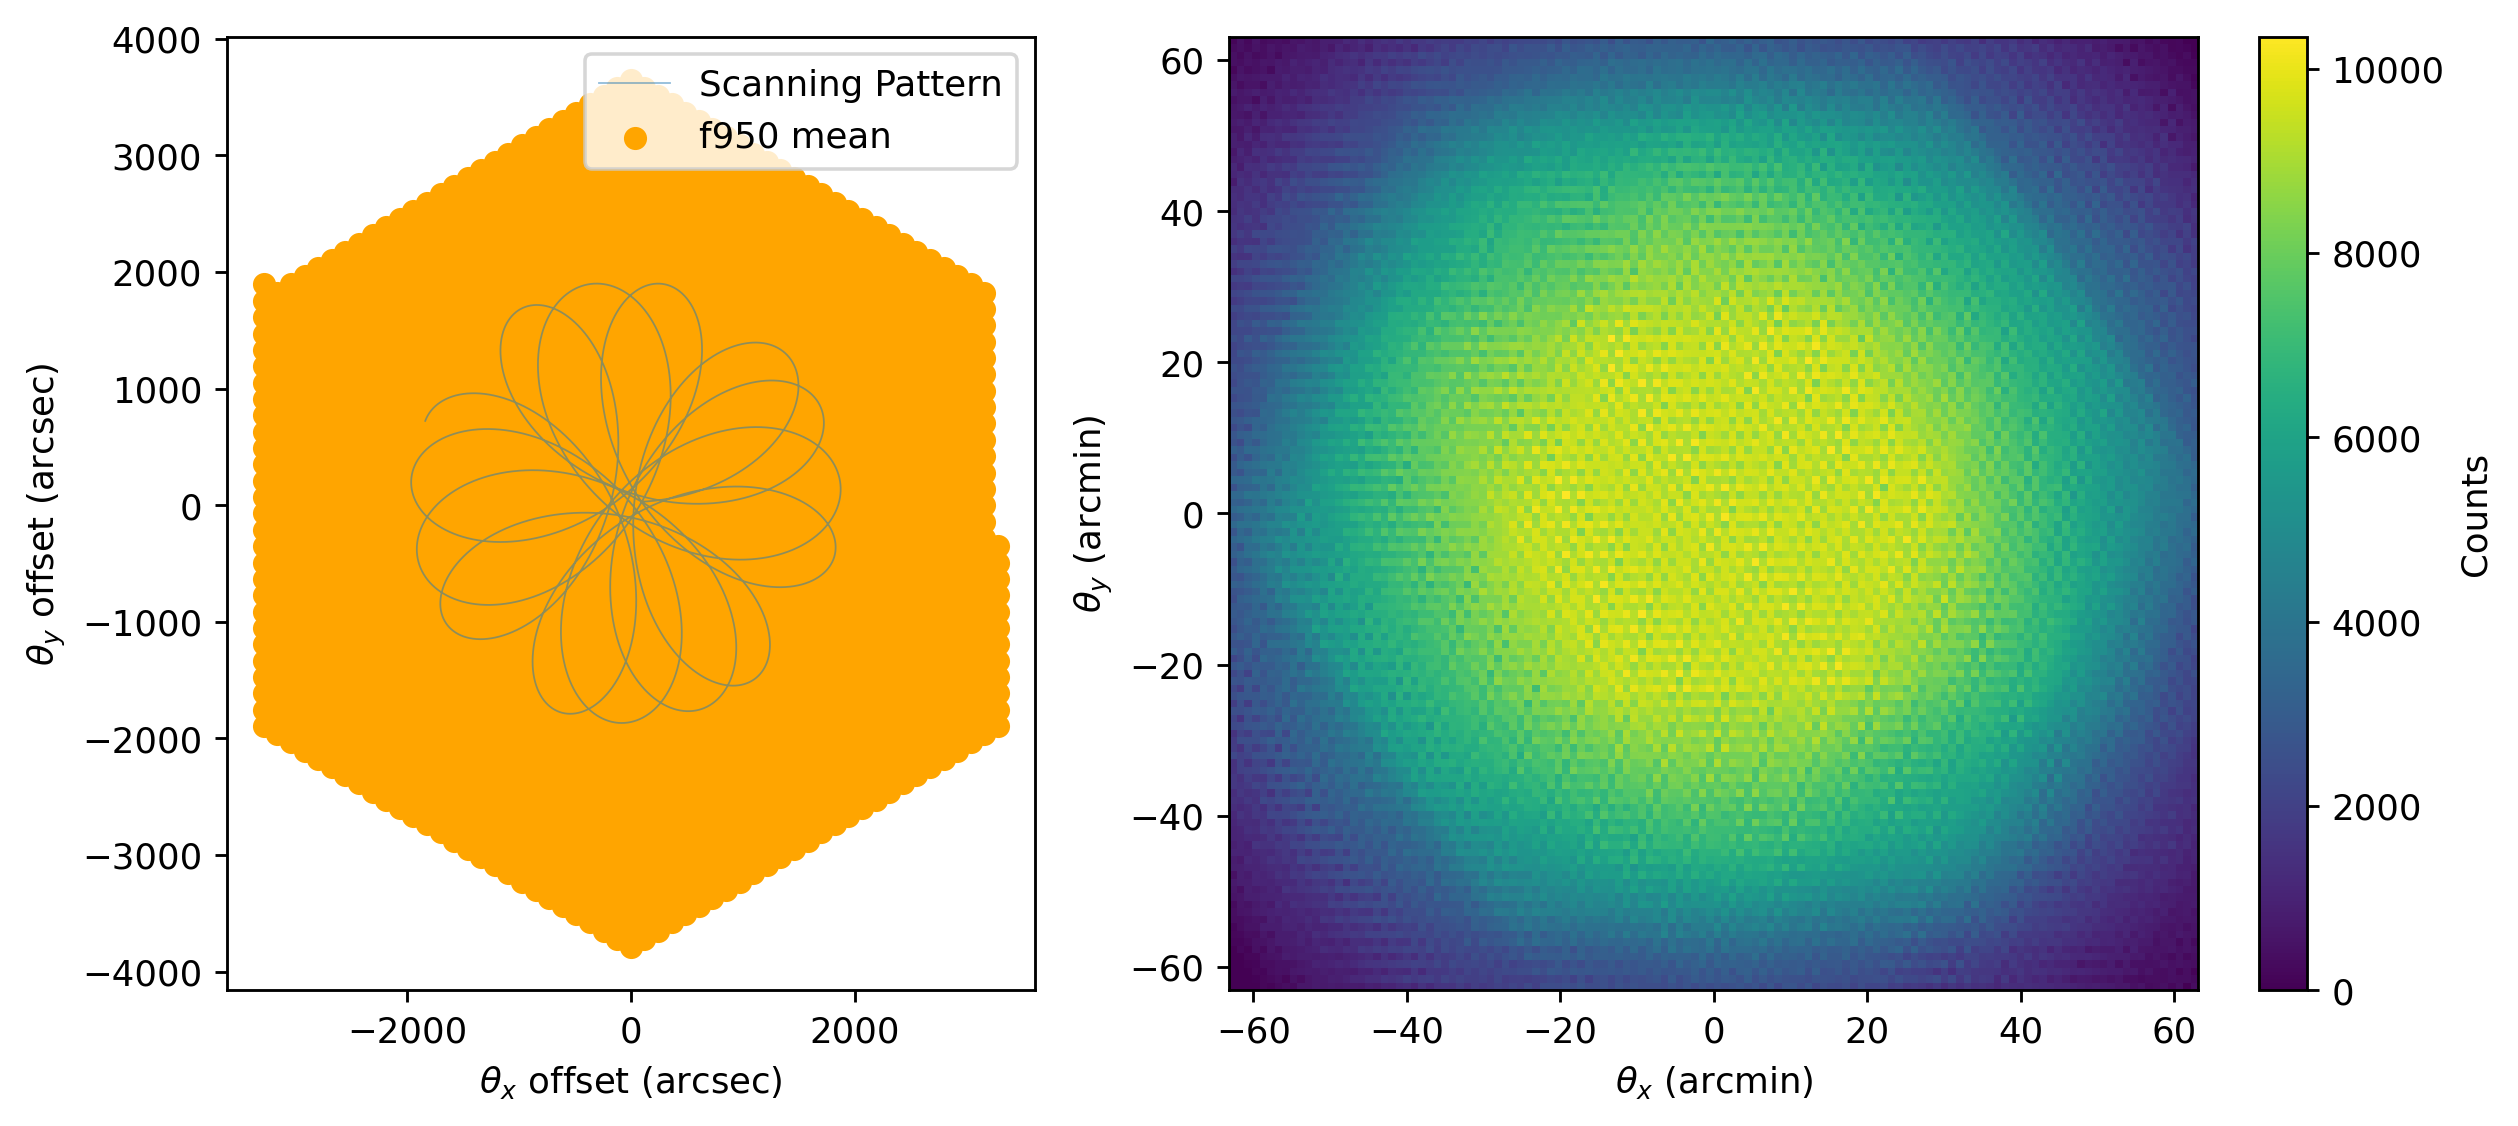

In [77]:
ig, axes = plt.subplots(
    1,
    2,
    figsize=(10, 4.5),
    dpi=256,
    tight_layout=True,
    gridspec_kw={"width_ratios": [1, 1.5]},
)
fig.suptitle("Detector setup for one band")

for uband in sim.array.ubands:
    band_mask = sim.array.dets.band == uband

    axes[0].plot(
        3600 * np.degrees(tod.boresight.ra - tod.boresight.ra.mean()),
        3600 * np.degrees(tod.boresight.dec - tod.boresight.dec.mean()),
        lw=5e-1,
        alpha=0.5,
        label="Scanning Pattern",
    )
    axes[0].scatter(
        3600 * np.degrees(sim.array.offset_x[band_mask]),
        3600 * np.degrees(sim.array.offset_y[band_mask]),
        label=f"{uband} mean",
        lw=5e-1,
        c="orange",
    )

axes[0].set_xlabel(r"$\theta_x$ offset (arcsec)")
axes[0].set_ylabel(r"$\theta_y$ offset (arcsec)")
axes[0].legend()

xs, ys = np.meshgrid(
    60 * np.rad2deg((mapper.x_bins[1:] + mapper.x_bins[:-1]) / 2),
    60 * np.rad2deg((mapper.y_bins[1:] + mapper.y_bins[:-1]) / 2),
)

im = axes[1].pcolormesh(
    xs,
    ys,
    mapper.map_cnts[tod.dets.band[0]],
    label="Photon counts in band " + tod.dets.band[0],
)

axes[1].set_xlabel(r"$\theta_x$ (arcmin)"), axes[1].set_ylabel(r"$\theta_y$ (arcmin)")
cbar = plt.colorbar(im, ax=axes[1])
cbar.set_label("Counts")
plt.show()

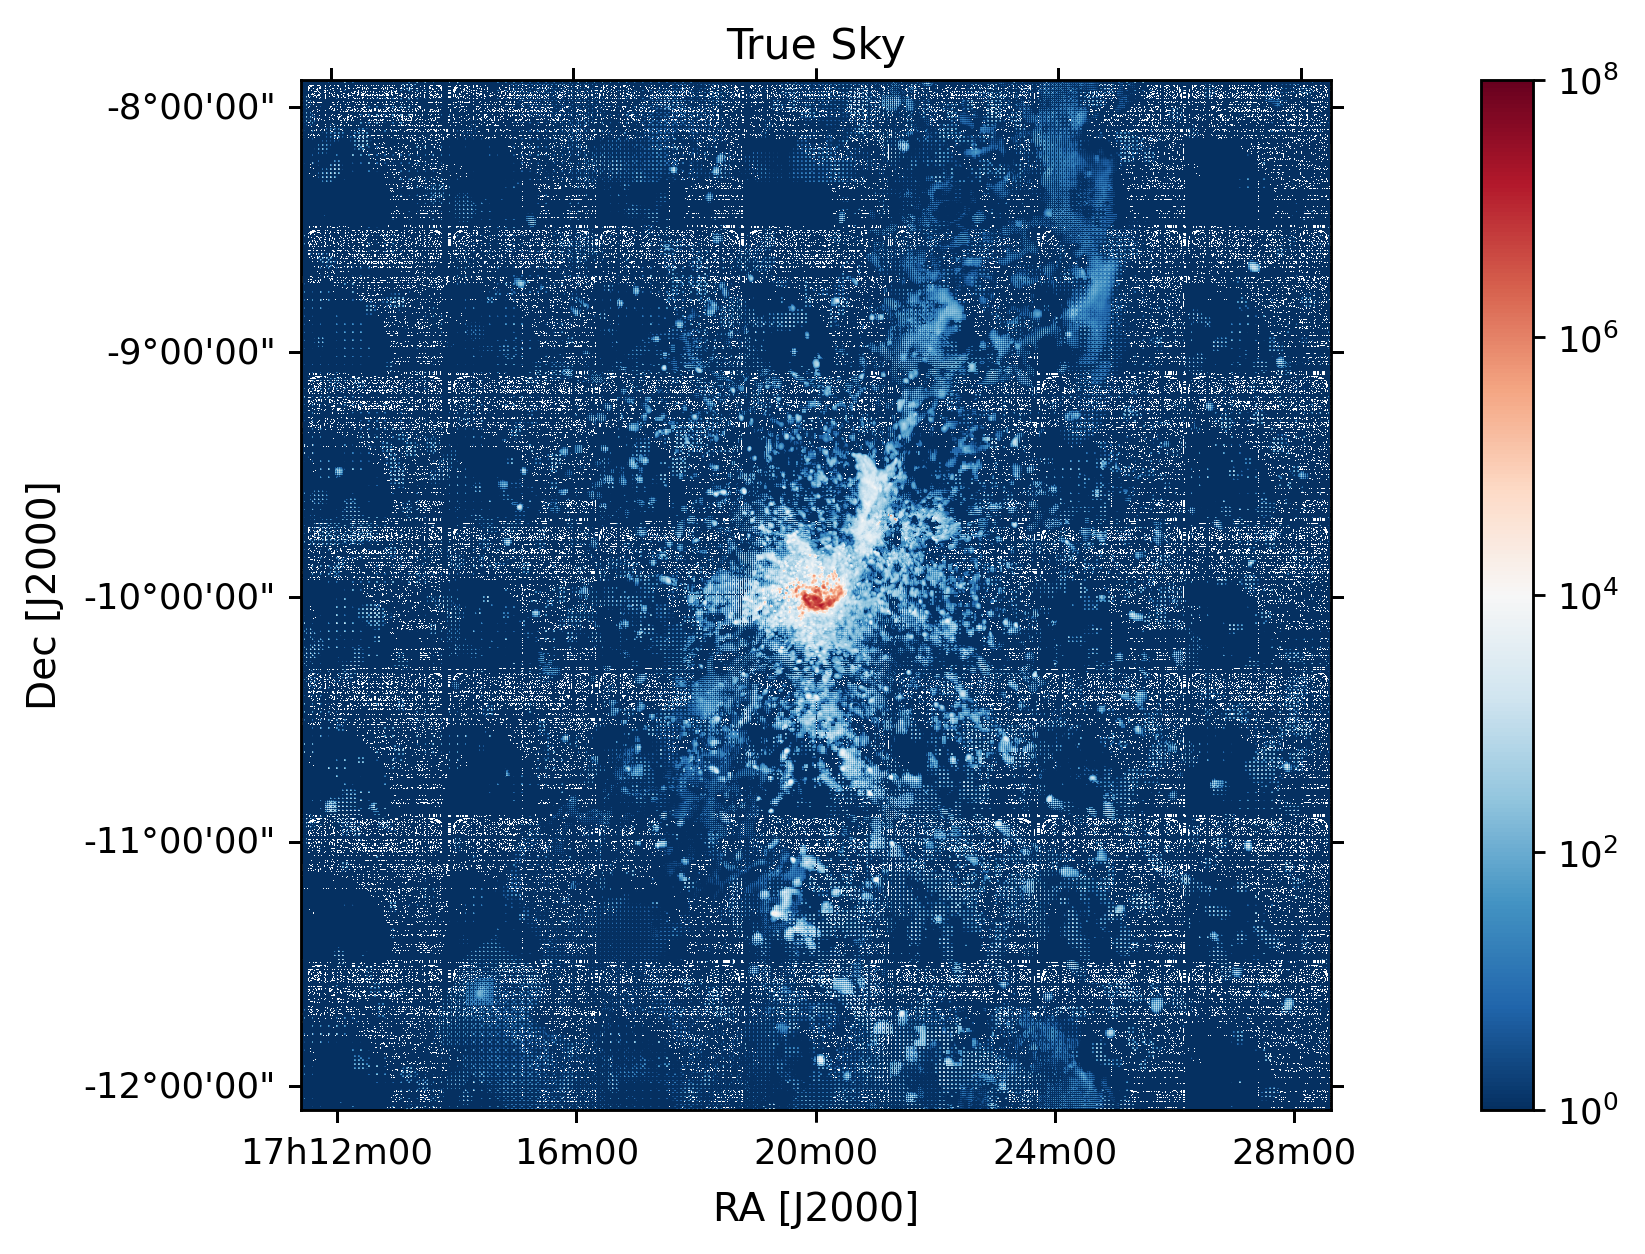

<Figure size 640x480 with 0 Axes>

In [78]:
fig = plt.figure(dpi=256, tight_layout=False)
fig.set_size_inches(12, 5, forward=True)

# - Plot
ext = size /2
ax = plt.subplot(1, 1, 1, projection=wcs_input)
ax.set_title("True Sky")
im = ax.imshow(hdu[0].data *1e3, cmap=cmap, norm=LogNorm(vmin=1e0, vmax=1e8),
               )# extent=[-ext, ext, -ext, ext])
cbar = plt.colorbar(im, ax=ax, shrink=1.0)

ra, dec = ax.coords
#print('RA DEC: ',ra,dec)
ra.set_major_formatter("hh:mm:ss")
dec.set_major_formatter("dd:mm:ss")
ra.set_axislabel(r"RA [J2000]", size=11)
dec.set_axislabel(r"Dec [J2000]", size=11)
ra.set_separator(("h", "m"))

pixel_sky_l = wcs_input.world_to_pixel(sky_l)
pixel_sky_u = wcs_input.world_to_pixel(sky_u)
#ax.axis(
 #  xmax=pixel_sky_l[0], ymin=pixel_sky_l[1], xmin=pixel_sky_u[0], ymax=pixel_sky_u[1])
plt.show()
plt.savefig(plot_path + 'maria_truesky.png')
#plt.close()

Filename: /Users/alicesc/Maria/outmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   (128, 128, 1)   float64   
None
[[[        nan         nan         nan ...  2.4854787   2.54115919
    2.45347099]
  [        nan         nan         nan ...  2.45948478  2.56903799
    2.52370629]
  [        nan         nan -0.77733857 ...  2.59132012  2.48677624
    2.83040761]
  ...
  [-1.87152401 -1.87349286 -1.86681598 ... -0.30403267 -0.20881161
   -0.66579972]
  [-1.88658509 -1.892521   -1.87329017 ... -0.09467934 -0.49005077
           nan]
  [-1.89589961 -1.88020499 -1.92266675 ... -0.36985351 -0.6375942
           nan]]]
[ -1.92266675  -1.91638295  -1.91161973 ...  72.26028442 104.1237128
          nan]


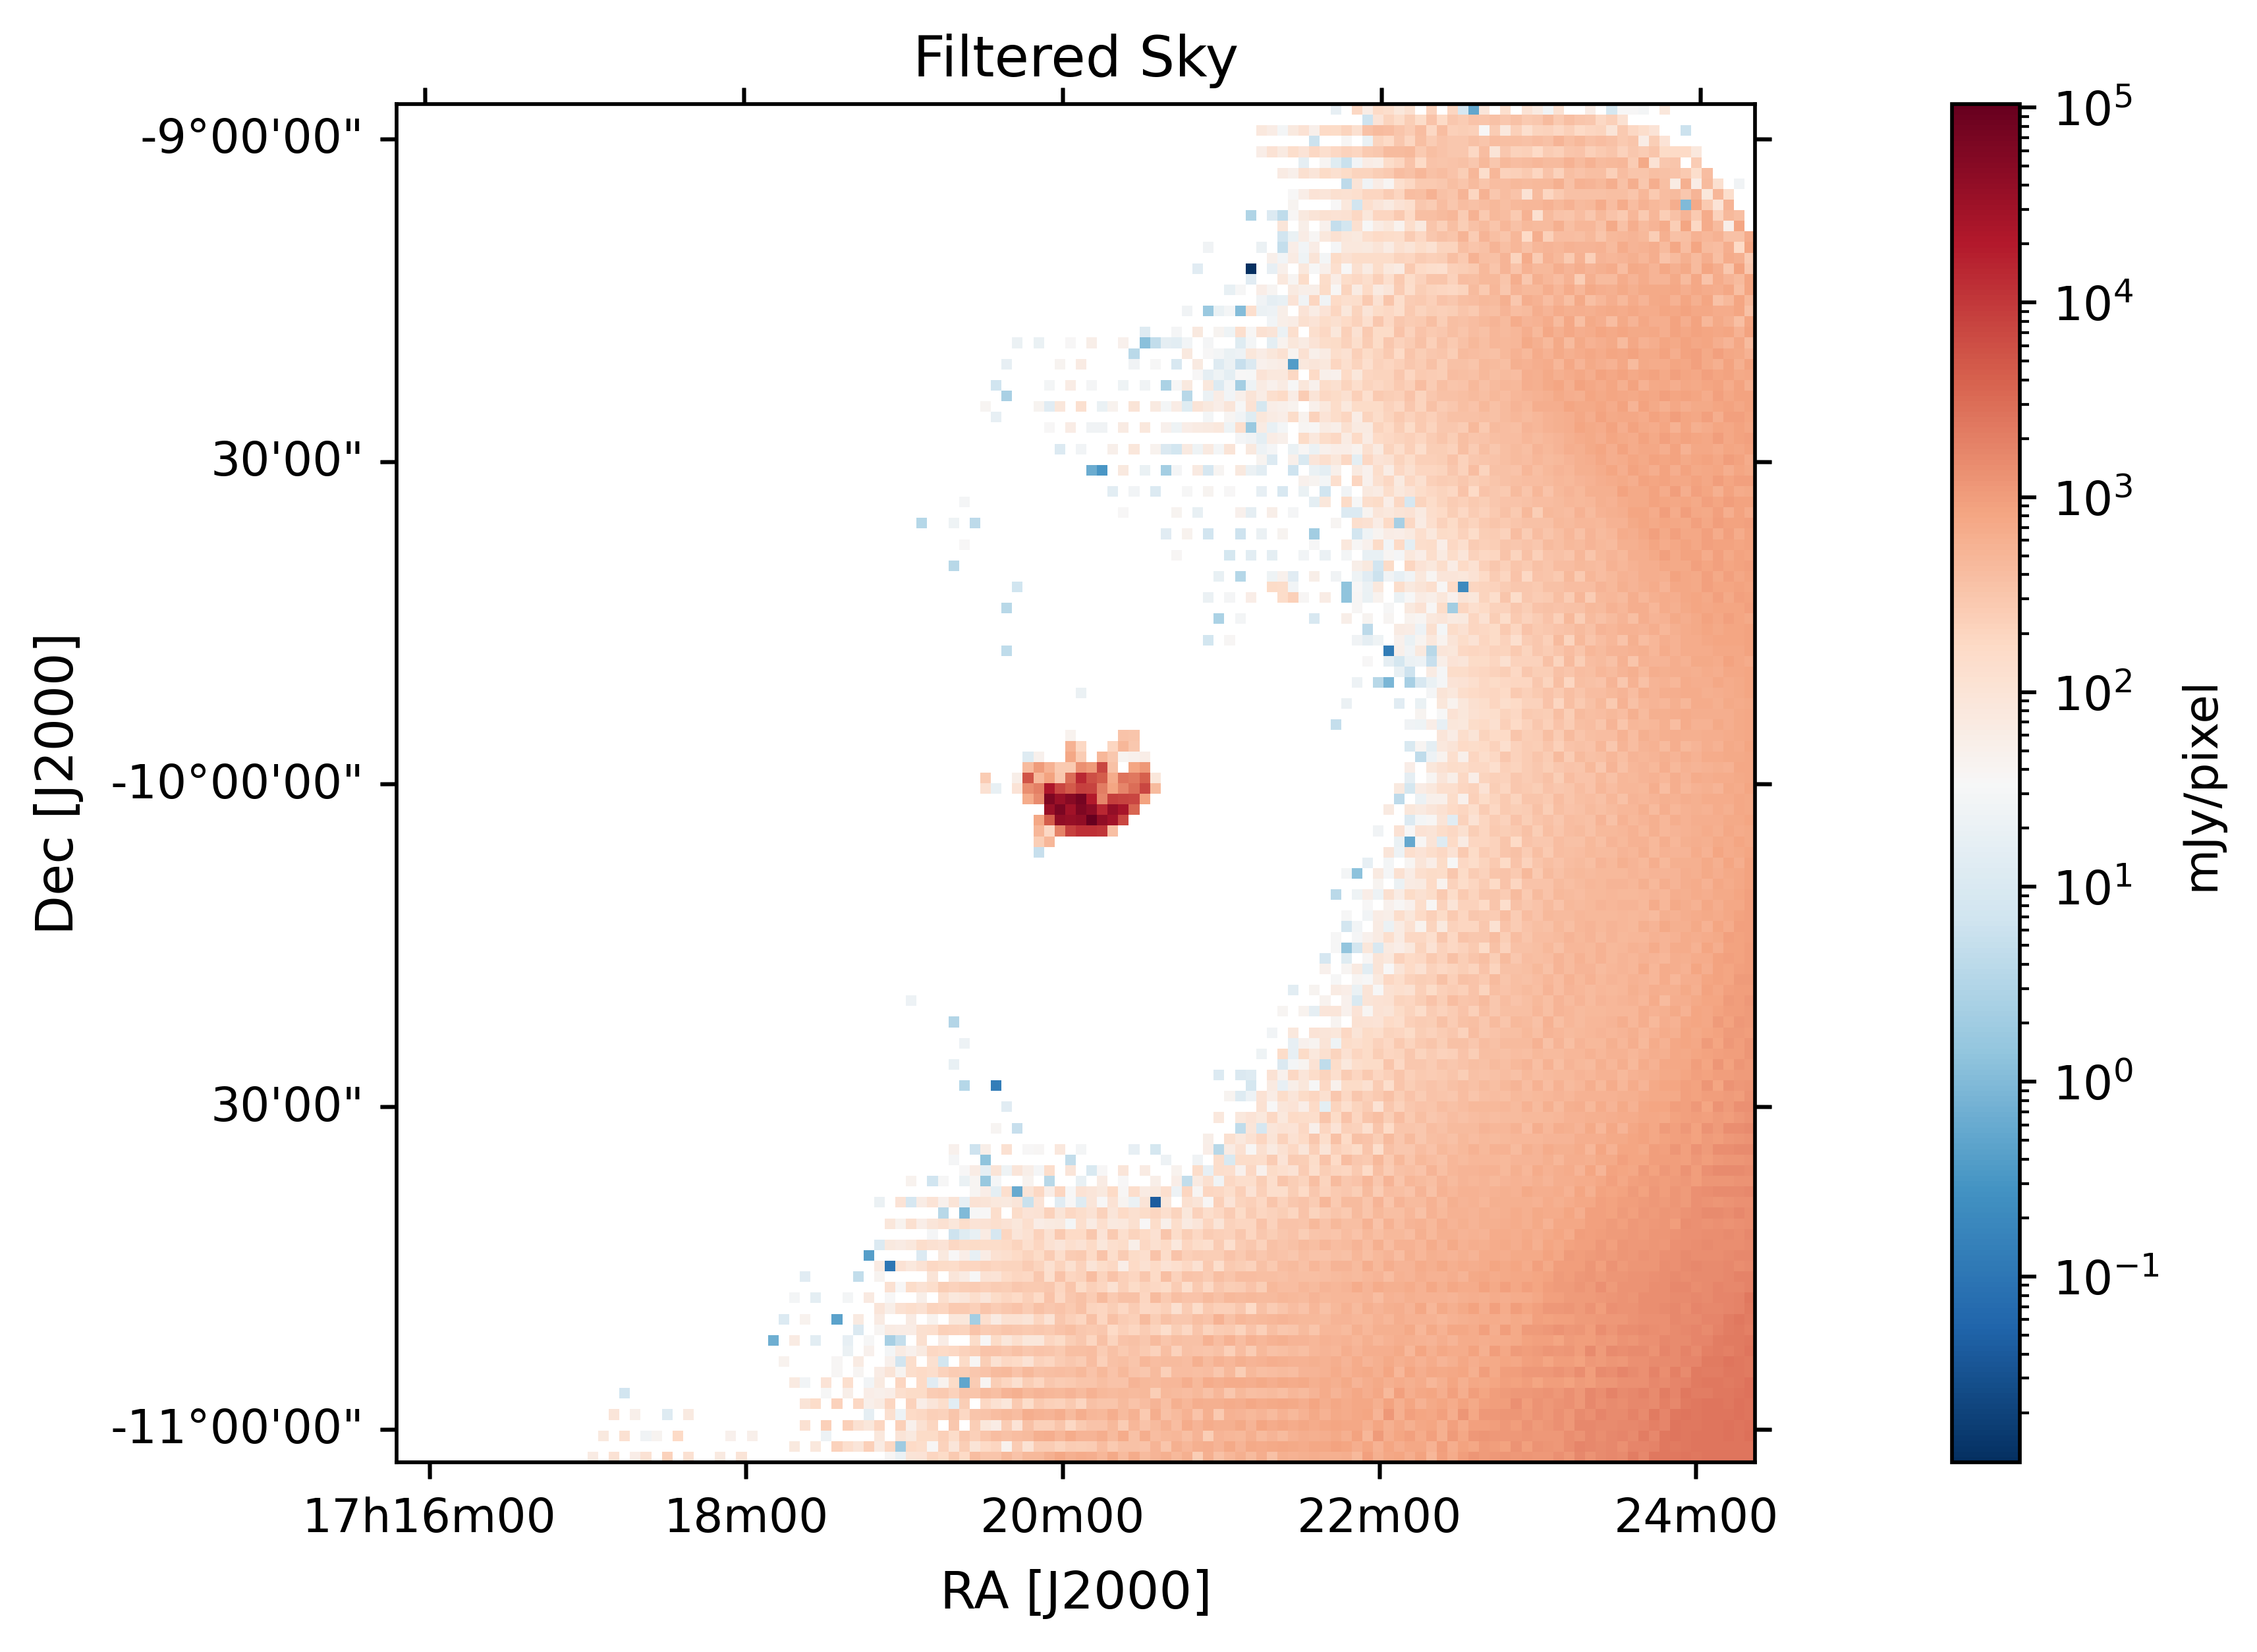

<Figure size 640x480 with 0 Axes>

In [79]:
# - Mock observation
outputfile = outfile_map
#cmap = 'hot_r'

hdu_out = fits.open(outputfile)
wcs_output = WCS(hdu_out[0].header, naxis=2)
print(hdu_out.info())
print(hdu_out[0].data)
fig = plt.figure(dpi=512, tight_layout=False)
fig.set_size_inches(12, 5, forward=True)

# - Plot
ax = plt.subplot(1, 1, 1, projection=wcs_output)
ax.set_title("Filtered Sky")
im = ax.imshow(hdu_out[0].data[0] * 1e3, cmap=cmap, norm=LogNorm(), )#extent=[-ext, ext, -ext, ext]) #vmin=1e-5, vmax=1e0
print(np.unique(hdu_out[0].data[0]))
cbar = plt.colorbar(im, ax=ax, shrink=1.0)
cbar.set_label("mJy/pixel")

ra, dec = ax.coords
#print('RA DEC: ',ra,dec)
ra.set_major_formatter("hh:mm:ss")
dec.set_major_formatter("dd:mm:ss")
ra.set_axislabel(r"RA [J2000]", size=11)
dec.set_axislabel(r"Dec [J2000]", size=11)
ra.set_separator(("h", "m"))

pixel_sky_l = wcs_input.world_to_pixel(sky_l)
pixel_sky_u = wcs_input.world_to_pixel(sky_u)
#ax.axis(
 #   xmax=pixel_sky_l[0], ymin=pixel_sky_l[1], xmin=pixel_sky_u[0], ymax=pixel_sky_u[1])
plt.show()
plt.savefig(plot_path + 'maria_filtered.png')
#plt.close()